In [1]:
import pandas as pd
import numpy as np

CIFAR-10 dataset consists of 10 different image types
0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

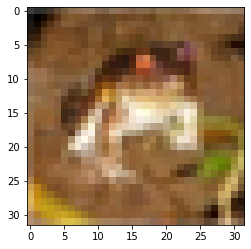

In [6]:
plt.imshow(x_train[0])

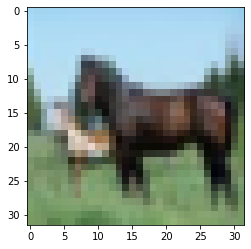

In [7]:
plt.imshow(x_train[12])

Preprocessing

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/225 #scale training set

In [11]:
x_test = x_test/255 #scale testing set

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

Labels

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

Building the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [26]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 64s 40ms/step - loss: 1.7448 - accuracy: 0.3661 - val_loss: 1.4157 - val_accuracy: 0.4872
Epoch 2/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2072 - accuracy: 0.5754 - val_loss: 1.0999 - val_accuracy: 0.6127
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0318 - accuracy: 0.6429 - val_loss: 1.2402 - val_accuracy: 0.5684
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9070 - accuracy: 0.6862 - val_loss: 1.2999 - val_accuracy: 0.5596
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8306 - accuracy: 0.7132 - val_loss: 1.1885 - val_accuracy: 0.6064


In [27]:
losses = pd.DataFrame(model.history.history)

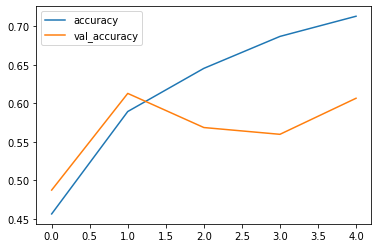

In [28]:
losses[['accuracy','val_accuracy']].plot()

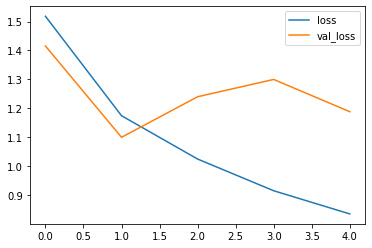

In [29]:
losses[['loss','val_loss']].plot()

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1884729862213135, 0.6064000129699707]


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.54      0.65      1000
           1       0.86      0.64      0.74      1000
           2       0.67      0.30      0.41      1000
           3       0.43      0.42      0.43      1000
           4       0.38      0.83      0.53      1000
           5       0.57      0.52      0.54      1000
           6       0.55      0.80      0.66      1000
           7       0.77      0.56      0.65      1000
           8       0.79      0.68      0.73      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.61     10000
   macro avg       0.66      0.61      0.61     10000
weighted avg       0.66      0.61      0.61     10000



In [34]:
confusion_matrix(y_test,predictions)

array([[544,  14,  42,  44, 153,  21,  32,  13, 101,  36],
       [ 19, 643,   8,  33,  24,   6,  96,  11,  24, 136],
       [ 36,   5, 300,  88, 328,  75, 127,  18,  16,   7],
       [  5,   6,  17, 417, 205, 165, 150,  23,   6,   6],
       [  3,   0,  13,  21, 835,  20,  59,  38,   8,   3],
       [  3,   3,  23, 174, 171, 524,  64,  30,   2,   6],
       [  0,   0,  11,  41, 120,  11, 801,   9,   2,   5],
       [  3,   0,  10,  73, 238,  71,  27, 564,   1,  13],
       [ 51,  20,  16,  36,  75,  21,  38,   4, 681,  58],
       [ 14,  55,   6,  35,  30,  11,  50,  20,  24, 755]])

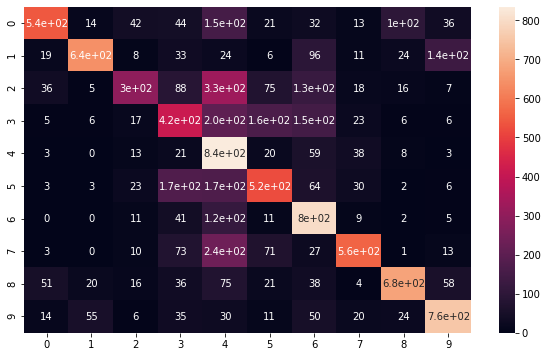

In [35]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

Predicting a given image

In [52]:
my_image = x_test[975]

In [53]:
y_test[975]

array([0], dtype=uint8)

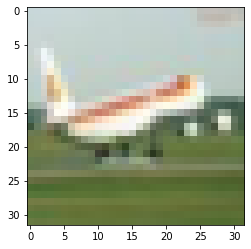

In [54]:
plt.imshow(my_image)

In [55]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])